# Environment Setup

This notebook is designed for Python version **3.11.5** and requires several external packages to run correctly. Below is a list of necessary packages:

- **IPython**: For powerful interactive shells.
- **Pillow** (PIL): For image processing capabilities.
- **ipywidgets**: For interactive HTML widgets.
- **joblib**: For lightweight pipelining.
- **matplotlib**: For creating visualizations.
- **networkx**: For creating and manipulating complex networks.
- **numba**: For JIT compilation.
- **numpy**: For support with large, multi-dimensional arrays and matrices.
- **pandas**: For data manipulation and analysis.
- **requests**: For sending HTTP requests.
- **scipy**: For scientific and technical computing.
- **seaborn**: For drawing attractive statistical graphics.
- **scikit-learn** (sklearn): For machine learning.
- **statsmodels**: For statistical modeling.

To install these packages, run the following command in a code cell:

```python
!pip install IPython Pillow ipywidgets joblib matplotlib networkx numba numpy pandas requests scipy seaborn scikit-learn statsmodels
```

Ensure that all packages are installed before proceeding to run the analyses in this notebook.

In [223]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import random
from read_sbml import create_model, read_interaction_tables

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Uncompartmentalized Model

## Loading the Submaps

In [194]:
model = create_model("Example Maps/AIR")

## Load the Data File

In [195]:
data = pd.read_csv("Data Files/ColitisFCData_pvalues.txt", index_col = 0)

## Perform Enrichment Analysis

In [196]:
results = model.data_enrichment(data)

['DSSd02', 'DSSd04', 'DSSd06', 'DSSd07', 'DSSd08', 'DSSd10', 'DSSd12', 'DSSd14']


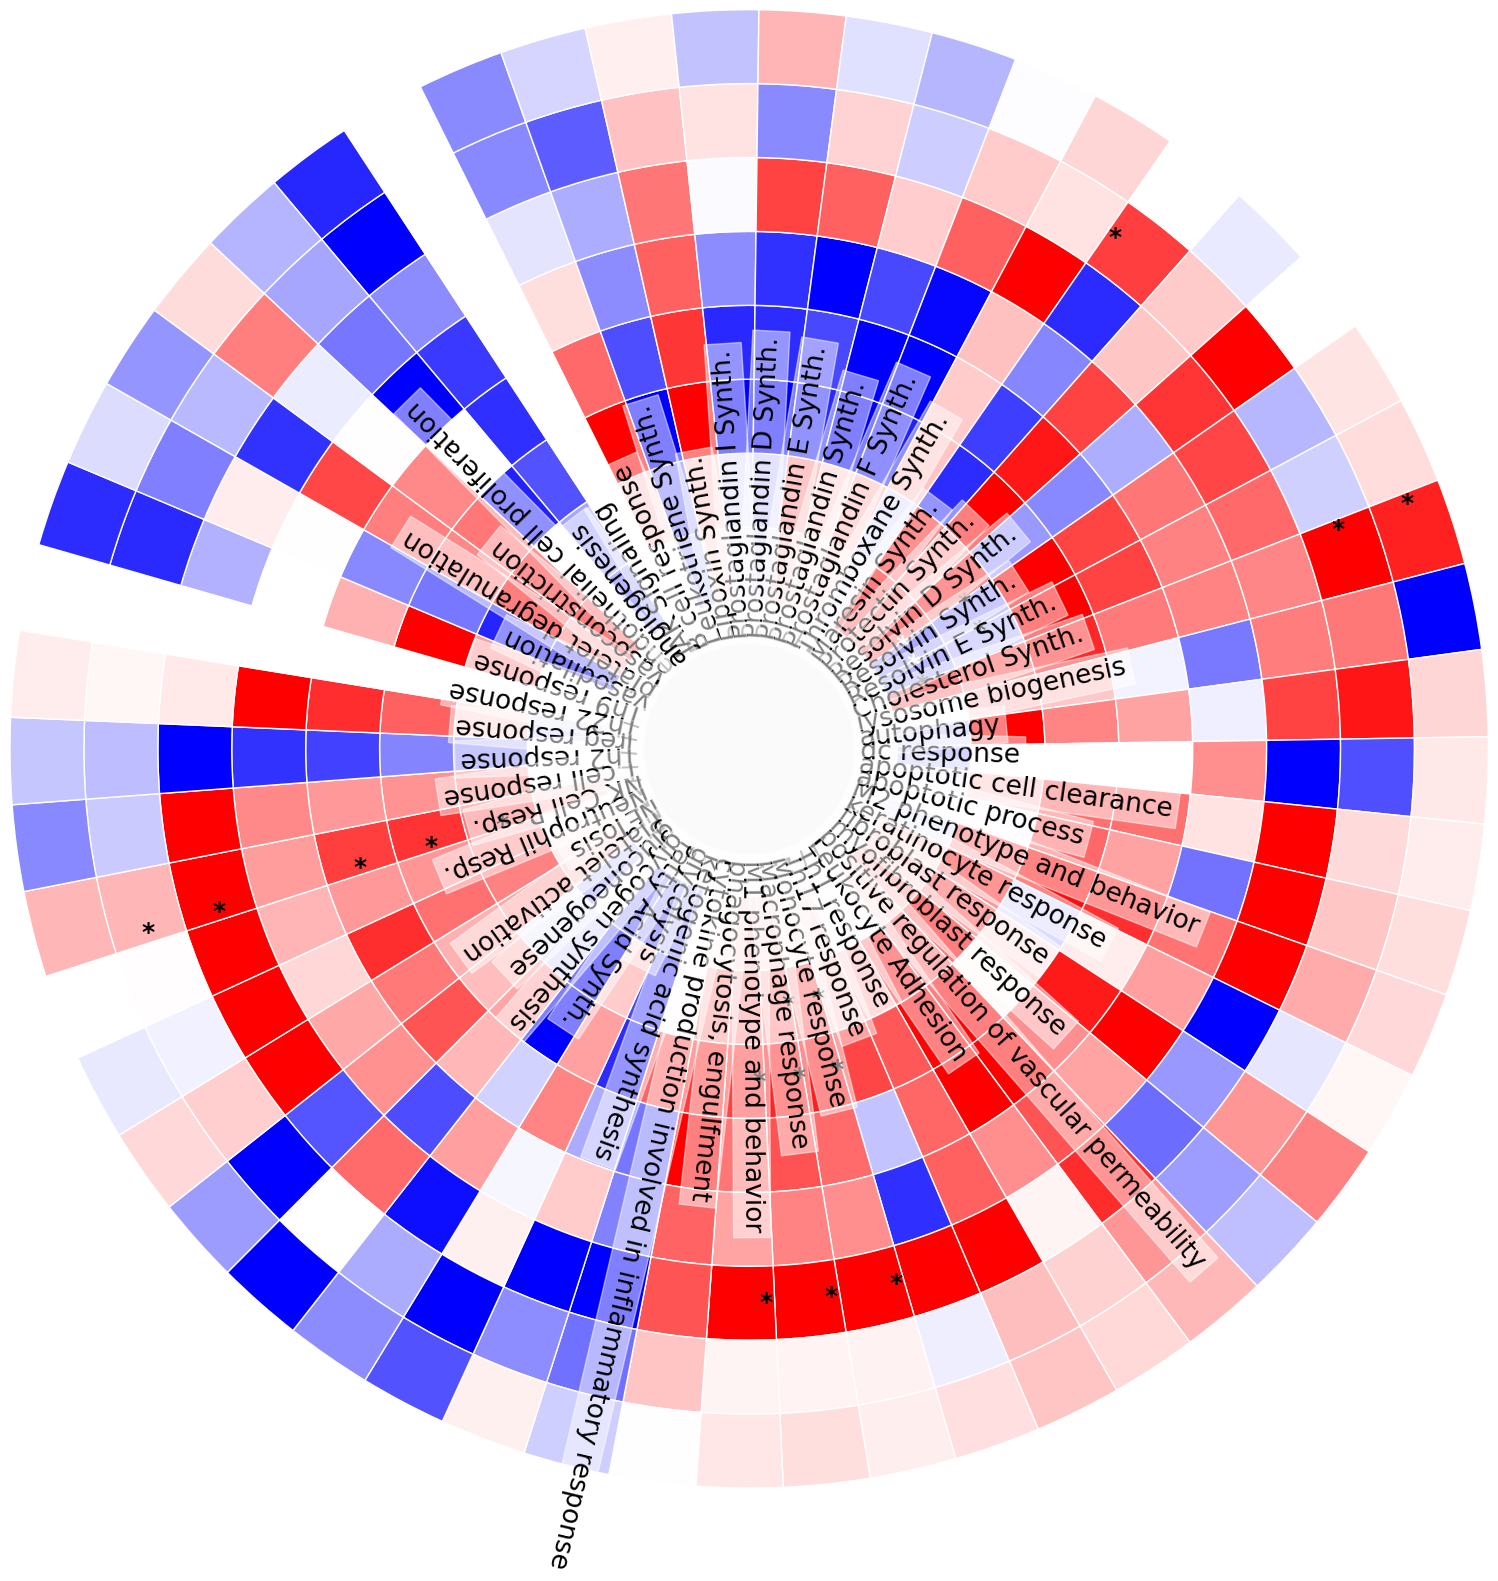

In [197]:
model.circle_plot(results)

# Compartmental Boolean Model

In [20]:
sarcopenia_model = create_model("Example Maps/Sarcopenia", compartment_specific = True)

## Boolean Simulation

In [27]:
sarcopenia_model.get_node_from_name("il12").print_boolean_rule()

''

In [28]:
for node in sarcopenia_model.nodes:
    if node.compartment == "":
        node.default_state = False

conditions = {
    sarcopenia_model.get_node_from_name("alcohol consumption"): [-1],
    sarcopenia_model.get_node_from_name("exercise"): [-1],
    sarcopenia_model.get_node_from_name("food intake"): 5*[1] + 10*[-1],
    sarcopenia_model.get_node_from_name("cirrhosis"): [-1],
    sarcopenia_model.get_node_from_name("lep"): [-1],
    sarcopenia_model.get_node_from_name("intestinal dysfunction"): [-1],
}

## Spatial Boolean Simulation